# `Alura`
## `Formação Machine Learning`
## `Curso 01 - Machine Learning: Classificação com SKLearn`
---
## `Projeto 03: Criação de sites (Concluídos ou Não)`

In [1]:
import pandas as pd

dados = pd.read_csv('datasets/projects.csv')
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
mapa = {
    "unfinished": "nao_finalizado",
    "expected_hours": "horas_esperadas",
    "price": "preco"
}

dados = dados.rename(columns=mapa)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
# Para ficar mais simples, vamos criar a coluna 'finalizado'
# Seus valores serão o inverso da coluna 'nao_finalizado', 0 = 1, 1 = 0
# Neste caso, na coluna 'finalizado': 1 = Concluído, 0 = Não concluído

troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

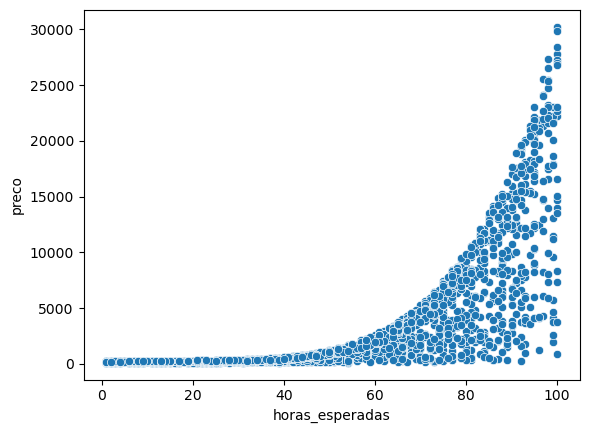

In [4]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

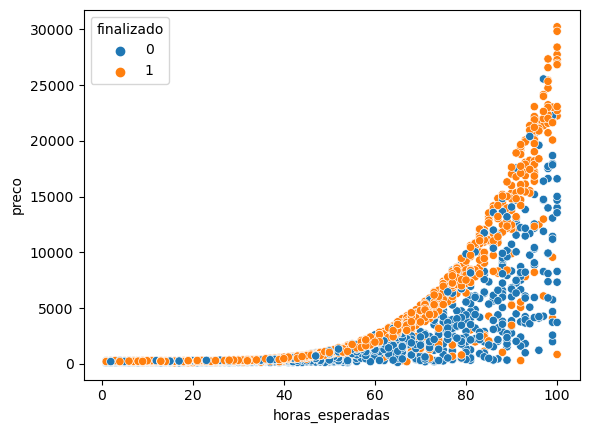

In [5]:
# Colorindo os pontos, com base se foram finalizados ou não
# 1 = finalizado
# 0 = não finalizados

sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

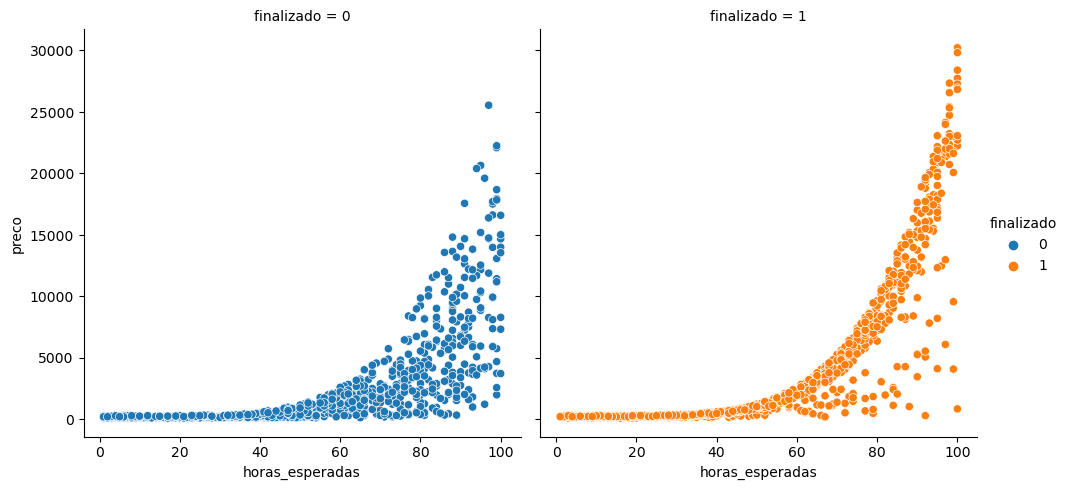

In [6]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [7]:
X = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, stratify=y)

model = LinearSVC()
model.fit(X_treino, y_treino)
previsoes = model.predict(X_teste)

acuracia = accuracy_score(y_teste, previsoes)
print(f'Acurácia: {acuracia * 100:.2f}%')

Acurácia: 49.26%


C:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [9]:
import numpy as np 
previsoes_de_base = np.ones(540)

In [10]:
acuracia = accuracy_score(y_teste, previsoes_de_base)
print(f'Acurácia (previsão de base - baseline): {acuracia * 100:.2f}%')

Acurácia (previsão de base - baseline): 52.59%


<Axes: xlabel='horas_esperadas', ylabel='preco'>

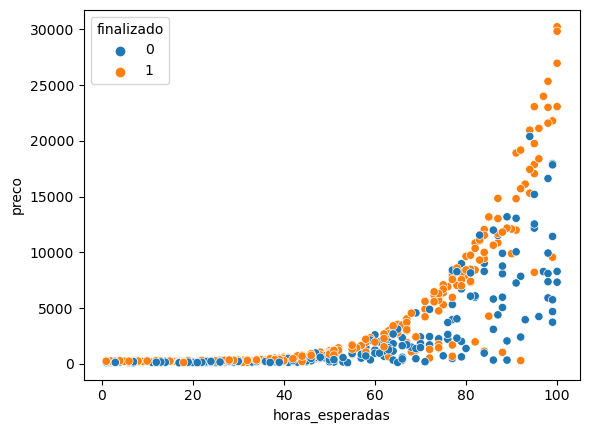

In [11]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=y_teste, data=X_teste)

In [12]:
X_min = X_teste.horas_esperadas.min()
X_max = X_teste.horas_esperadas.max()
y_min = X_teste.preco.min()
y_max = X_teste.preco.max()
print(X_min, X_max, y_min, y_max)

1 100 100 30223


In [13]:
pixels = 100
eixo_X = np.arange(X_min, X_max, (X_max - X_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [14]:
xx, yy = np.meshgrid(eixo_X, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [15]:
z = model.predict(pontos)
z = z.reshape(xx.shape)
z

C:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

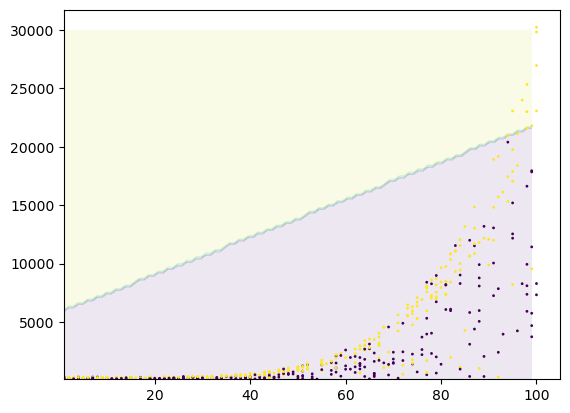

In [16]:
import matplotlib.pyplot as plt 

plt.contourf(xx, yy, z, alpha=0.1)
plt.scatter(X_teste.horas_esperadas, X_teste.preco, c=y_teste, s=1)

# DECISION BOUNDARY

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, stratify=y)

model = SVC()
model.fit(X_treino, y_treino)
previsoes = model.predict(X_teste)

acuracia = accuracy_score(y_teste, previsoes)
print(f'Acurácia: {acuracia * 100:.2f}%')

Acurácia: 55.19%


C:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


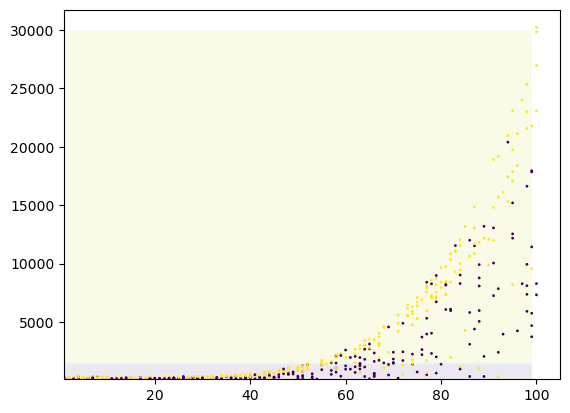

In [18]:
X_min = X_teste.horas_esperadas.min()
X_max = X_teste.horas_esperadas.max()
y_min = X_teste.preco.min()
y_max = X_teste.preco.max()

pixels = 100
eixo_X = np.arange(X_min, X_max, (X_max - X_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_X, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(pontos)
z = z.reshape(xx.shape)
z

import matplotlib.pyplot as plt 

plt.contourf(xx, yy, z, alpha=0.1)
plt.scatter(X_teste.horas_esperadas, X_teste.preco, c=y_teste, s=1)

# DECISION BOUNDARY

In [19]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
raw_X_treino, raw_X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_X_treino)
X_treino = scaler.transform(raw_X_treino)
X_teste = scaler.transform(raw_X_teste)

model = SVC()
model.fit(X_treino, y_treino)
previsoes = model.predict(X_teste)

acuracia = accuracy_score(y_teste, previsoes)
print(f'Acurácia: {acuracia * 100:.2f}%')

Acurácia: 66.85%


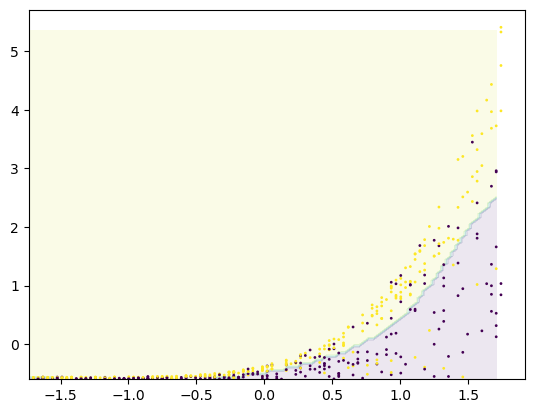

In [20]:
data_X = X_teste[:, 0]
data_y = X_teste[:, 1]

X_min = data_X.min()
X_max = data_X.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_X = np.arange(X_min, X_max, (X_max - X_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_X, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(pontos)
z = z.reshape(xx.shape)
z

import matplotlib.pyplot as plt 

plt.contourf(xx, yy, z, alpha=0.1)
plt.scatter(data_X, data_y, c=y_teste, s=1)

# DECISION BOUNDARY